In [ ]:
#672 *1 noise+source 673 *2.2 noise+source 674 *2.2 noise
name_for_run = 'chunk23_test1'
rs_type = 'more_rs680'
brickname = '1273p255'

In [ ]:
%pylab inline
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u

In [330]:
!ls /global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/chunk23_test1/coadd/127/1273p255/

more_rs650  more_rs659	more_rs675  more_rs684	more_rs693  more_rs702
more_rs651  more_rs665	more_rs676  more_rs685	more_rs694  more_rs703
more_rs652  more_rs666	more_rs677  more_rs686	more_rs695  more_rs704
more_rs653  more_rs667	more_rs678  more_rs687	more_rs696  more_skip_rs670
more_rs654  more_rs668	more_rs679  more_rs688	more_rs697  rs0
more_rs655  more_rs671	more_rs680  more_rs689	more_rs698  rs1
more_rs656  more_rs672	more_rs681  more_rs690	more_rs699  rs2
more_rs657  more_rs673	more_rs682  more_rs691	more_rs700
more_rs658  more_rs674	more_rs683  more_rs692	more_rs701


In [ ]:
band = 'g'
fn = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/'+\
name_for_run+'/coadd/'+brickname[:3]+\
'/'+brickname+'/'+rs_type+'/legacysurvey-'+brickname+'-image-'+band+'.fits.fz'
coadd = fits.getdata(fn)

In [ ]:
fn = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/'+\
name_for_run+'/tractor/'+brickname[:3]+\
'/'+brickname+'/'+rs_type+'/tractor-'+brickname+'.fits'
tractor = fits.getdata(fn)

In [ ]:
fn = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/'+\
name_for_run+'/coadd/'+brickname[:3]+\
'/'+brickname+'/'+rs_type+'/legacysurvey-'+brickname+'-model-'+band+'.fits.fz'
model = fits.getdata(fn)

In [ ]:
fn = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/'+\
name_for_run+'/obiwan/'+brickname[:3]+\
'/'+brickname+'/'+rs_type+'/simcat-elg-'+brickname+'.fits'
sim = fits.getdata(fn)

In [ ]:
fn = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/'+\
name_for_run+'/coadd/'+brickname[:3]+\
'/'+brickname+'/'+rs_type+'/legacysurvey-'+brickname+'-sims-'+band+'.fits.fz'
sim_img = fits.getdata(fn)

In [ ]:
fn = '/global/project/projectdirs/cosmo/data/legacysurvey/dr3/coadd/'\
+brickname[:3]+'/'+brickname+'/legacysurvey-'+brickname+'-image-g.fits'

tractor_origin = fits.getdata(fn)

In [ ]:
fn

In [ ]:
c1 = SkyCoord(ra=tractor['ra']*u.degree, dec=tractor['dec']*u.degree)
c2 = SkyCoord(ra=sim['ra']*u.degree, dec=sim['dec']*u.degree)
idx, d2d, d3d = c1.match_to_catalog_sky(c2)
w = d2d.value <= 1./3600.
idx1 = np.where(w)[0]
idx[~w] = -1
idx2 = idx[idx>-1]

tractor_matched = tractor[idx1]
sim_matched = sim[idx2]
print(len(tractor_matched),len(sim_matched))
flux = tractor_matched['flux_'+band]
flux_sim = sim_matched[band+'flux']

In [ ]:
'''
threshold = -0.1
bad_source_idx = np.where((flux-flux_sim>threshold)|(flux-flux_sim<-threshold))[0]
tractor_bad = tractor_matched[bad_source_idx]
bx = tractor_bad['bx']
by = tractor_bad['by']
'''
tractor_bad=tractor_matched
bx = tractor_matched['bx']
by = tractor_matched['by']
flux_diff = sim_matched[band+'flux'] - tractor_matched['flux_'+band]

0.102265379398
-1.1283
-1.24432
0.0558198
0.00677204
real - sim pixels, sum: -1.591442 mean:-0.000995


"\nDD_i = np.zeros(int(radius*2*1.5))\ncounter = np.zeros(int(radius*2*1.5))\nRR_i = np.zeros(int(radius*2*1.5))\nDD_total = 0\nDD_mean = dat.mean()\nran_dat = np.random.randn(int(radius*2*1.5),int(radius*2*1.5))*DD_mean\nfor i in range(len(dat)):\n    for j in range(len(dat[0])):\n        for k in range(len(dat)):\n            for l in range(len(dat)):\n                if i!=j or k!=l:\n                    n = int(np.floor(np.sqrt((i-k)**2+(j-l)**2)))\n                    item1 = (dat[i][j]-DD_mean)*(dat[k][l]-DD_mean)\n                    #if n==1:\n                        #print(item1,dat[i][j]-DD_mean,dat[k][l]-DD_mean,DD_mean)\n                    #item2 = (dat[i][j]-DD_mean)*ran_dat[i][j]\n                    #item3 = ran_dat[i][j]*ran_dat[i][j]\n                    DD_i[n-1]+=item1\n                    counter[n-1]+=1\n                    #DR_i[n-1]+=item2\n                    #RR_i[n-1]+=item3\n#print(DD_i[0],counter)\ncorr = (DD_i/counter)\nplt.plot(np.arange(radius*2*1.5)[:15

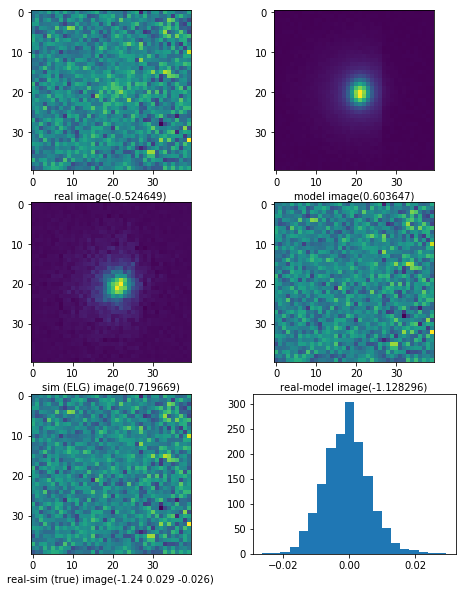

In [309]:
radius = 20
i=88
print(flux_diff[i])
plt.figure(figsize = (8,10))
plt.subplot(3,2,1)
x_cen = int(bx[i])
y_cen = int(by[i])
dat = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('real image(%f)'%dat.sum())

plt.subplot(3,2,2)
x_cen = int(bx[i])
y_cen = int(by[i])
dat = model[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('model image(%f)'%dat.sum())
plt.subplot(3,2,3)
x_cen = int(bx[i])
y_cen = int(by[i])
dat = sim_img[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('sim (ELG) image(%f)'%dat.sum())
plt.subplot(3,2,4)
x_cen = int(bx[i])
y_cen = int(by[i])
dat = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]-\
model[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
print(dat.sum())
plt.xlabel('real-model image(%f)'%dat.sum())

plt.subplot(3,2,5)
x_cen = int(bx[i])
y_cen = int(by[i])
dat = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]-\
sim_img[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('real-sim (true) image(%.2f %.3f %.3f)'%(dat.sum(),dat.max(),dat.min()))
print(dat.sum())
print(dat.max()-dat.min())

plt.subplot(3,2,6)
#dat = tractor_origin[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
#dat = np.random.randn(20,20)*0.01
p=plt.hist(dat.ravel(),bins=20)

weight = sim_img[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
sums = ((dat.ravel()*weight.ravel())/(weight.ravel().sum())).sum()*len(weight.ravel())
means = (dat.ravel()*weight.ravel()).sum()/(weight.ravel().sum())
print(dat.ravel().std())    
print('real - sim pixels, sum: %f mean:%f' %(sums, means))
#plt.xlabel('real - sim pixels, mean:%f' %dat.mean())
'''
DD_i = np.zeros(int(radius*2*1.5))
counter = np.zeros(int(radius*2*1.5))
RR_i = np.zeros(int(radius*2*1.5))
DD_total = 0
DD_mean = dat.mean()
ran_dat = np.random.randn(int(radius*2*1.5),int(radius*2*1.5))*DD_mean
for i in range(len(dat)):
    for j in range(len(dat[0])):
        for k in range(len(dat)):
            for l in range(len(dat)):
                if i!=j or k!=l:
                    n = int(np.floor(np.sqrt((i-k)**2+(j-l)**2)))
                    item1 = (dat[i][j]-DD_mean)*(dat[k][l]-DD_mean)
                    #if n==1:
                        #print(item1,dat[i][j]-DD_mean,dat[k][l]-DD_mean,DD_mean)
                    #item2 = (dat[i][j]-DD_mean)*ran_dat[i][j]
                    #item3 = ran_dat[i][j]*ran_dat[i][j]
                    DD_i[n-1]+=item1
                    counter[n-1]+=1
                    #DR_i[n-1]+=item2
                    #RR_i[n-1]+=item3
#print(DD_i[0],counter)
corr = (DD_i/counter)
plt.plot(np.arange(radius*2*1.5)[:15]+1,corr[:15],color = 'red',marker='.',linestyle='--')
'''

In [311]:
from astropy.stats import sigma_clipped_stats
sigma_clipped_stats(coadd,sigma=6.0)

(-0.00036504259616075639, -0.00045361614, 0.0048371136691417564)

In [312]:
DD_i

array([  1.25013102e-03,  -1.31865080e-02,  -1.71146230e-03,
         6.58215438e-03,  -2.56539453e-03,  -1.08481898e-02,
         2.53821648e-03,  -3.41175703e-03,   1.68856406e-02,
        -1.53488888e-02,  -7.82792649e-03,   1.23170493e-02,
        -3.68736463e-03,  -2.75350614e-03,  -1.12922020e-03,
         5.48764629e-03,  -6.40228254e-04,   2.00082931e-03,
        -2.39206304e-03,   6.94925920e-03,  -7.98898757e-03,
         8.42683202e-04,  -4.95467036e-03,   7.07326506e-03,
        -3.53949319e-03,  -4.33836879e-03,   4.69335105e-03,
         1.03664289e-04,   1.28165513e-04,  -4.18571315e-03,
         1.65319981e-03,  -5.69415477e-04,   1.33243123e-03,
        -5.97909463e-04,   1.17641798e-03,  -4.66844318e-04,
        -9.59670570e-05,  -8.64155070e-04,   7.78229196e-06,
        -2.99483697e-05,  -3.09007487e-06,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.18476117e-02])

(-0.6, 0.6)

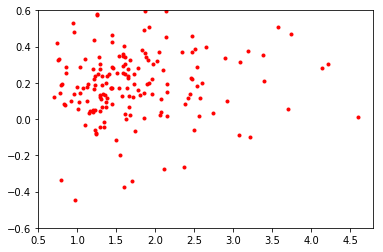

In [236]:
plt.plot(sim_matched['rflux'],\
         sim_matched['rflux'] - tractor_matched['flux_r'],'r.')
plt.gca().set_ylim((-0.6,0.6))

In [313]:
flux_diff = sim_matched['gflux'] - tractor_matched['flux_g']
print(flux_diff[(flux_diff>-1)&(flux_diff<1)].mean())

flux_diff = sim_matched['rflux'] - tractor_matched['flux_r']
print(flux_diff[(flux_diff>-1)&(flux_diff<1)].mean())

flux_diff = sim_matched['zflux'] - tractor_matched['flux_z']
print(flux_diff[(flux_diff>-1)&(flux_diff<1)].mean())

0.157456787225
0.177004400797
0.252818954923


In [ ]:
flux_diff = sim_matched['gflux'] - tractor_matched['flux_g']
radius = 20
flux_sum = []
for i in range(len(flux_diff)):
    x_cen = int(bx[i])
    y_cen = int(by[i])
    dat = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]-\
    sim_img[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
    weight = sim_img[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
    sums = ((dat.ravel()*weight.ravel())/(weight.ravel().sum())).sum()
    flux_sum.append(sums)
flux_sum = np.array(flux_sum)
sel = (flux_diff>-1)&(flux_diff<1)&(flux_sum>-0.0007)&(flux_sum<0.0005)
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(flux_sum[sel].reshape(-1,1), -flux_diff[sel].reshape(-1,1))
print(-flux_diff[sel].mean())
x = np.arange(-0.0007,0.0003,0.00001)
y_pred = regr.predict(x.reshape(-1,1))
#plt.plot(x.reshape(1,-1)[0],y_pred.reshape(1,-1)[0]-0.2*regr.coef_[0][0],'k--')
#plt.plot(x.reshape(1,-1)[0],y_pred.reshape(1,-1)[0]+0.2*regr.coef_[0][0],'k--')
plt.plot(x,y_pred,'k--')
plt.plot(flux_sum[sel],-flux_diff[sel],'r.')
print('Coefficients: \n', regr.coef_)
print('intercept: \n', regr.intercept_)

Coefficients: 
 [[ 0.10712224]]
intercept: 
 [-0.00143886]


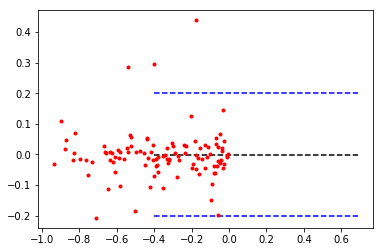

In [186]:
flux_sum = np.array(flux_sum)
sel = (flux_diff>-1)&(flux_diff<1)&(flux_sum>-1)&(flux_sum<1)&(flux_sum<0)
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(flux_sum[sel].reshape(-1,1), -flux_diff[sel].reshape(-1,1))
x = np.arange(-0.4,0.7,0.01)
y_pred = regr.predict(x.reshape(-1,1))
plt.plot(x,regr.intercept_*np.ones_like(x),'k--')
plt.plot(x,np.zeros_like(x)-0.2,'b--')
plt.plot(x,np.zeros_like(x)+0.2,'b--')
plt.plot(flux_sum[sel],-flux_diff[sel]-regr.coef_[0][0]*flux_sum[sel],'r.')
print('Coefficients: \n', regr.coef_)
print('intercept: \n', regr.intercept_)

-0.366104297311
0.377438146611
-2.69205
-2.53951
0.0359651
1.03192759005 0.909292
0.608348608017 0.0385963771899
0.45 0.0


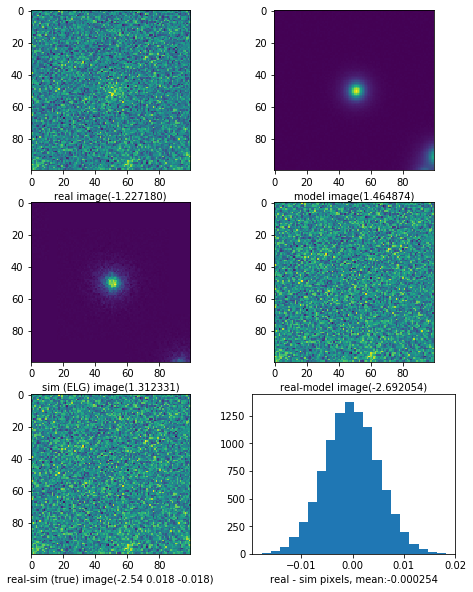

In [1220]:
biased_sel = (-flux_diff-regr.coef_[0][0]*flux_sum<-0.2)&sel

idx = np.where(biased_sel)[0]
i = idx[3]
print(-flux_diff[i]-regr.coef_[0][0]*flux_sum[i])
radius = 50

print(flux_diff[i])
plt.figure(figsize = (8,10))
plt.subplot(3,2,1)
x_cen = int(bx[i])
y_cen = int(by[i])
dat = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('real image(%f)'%dat.sum())

plt.subplot(3,2,2)
x_cen = int(bx[i])
y_cen = int(by[i])
dat = model[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('model image(%f)'%dat.sum())
plt.subplot(3,2,3)
x_cen = int(bx[i])
y_cen = int(by[i])
dat = sim_img[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('sim (ELG) image(%f)'%dat.sum())
plt.subplot(3,2,4)
x_cen = int(bx[i])
y_cen = int(by[i])
dat = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]-\
model[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
print(dat.sum())
plt.xlabel('real-model image(%f)'%dat.sum())

plt.subplot(3,2,5)
x_cen = int(bx[i])
y_cen = int(by[i])
dat = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]-\
sim_img[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('real-sim (true) image(%.2f %.3f %.3f)'%(dat.sum(),dat.max(),dat.min()))
print(dat.sum())
print(dat.max()-dat.min())

plt.subplot(3,2,6)
p=plt.hist(dat.ravel(),bins=20)
plt.xlabel('real - sim pixels, mean:%f' %dat.mean())
sim_bad = sim_matched[bad_source_idx]
print(sim_bad['gflux'][i],tractor_bad['flux_g'][i])
print(sim_bad['rhalf'][i],sim_bad['e2'][i]**2+sim_bad['e1'][i]**2)
print(tractor_bad['shapeexp_r'][i],tractor_bad['shapeexp_e1'][i]**2+tractor_bad['shapeexp_e2'][i]**2)

Coefficients: 
 [[ 0.01769885]]
intercept: 
 [ 0.01863659]


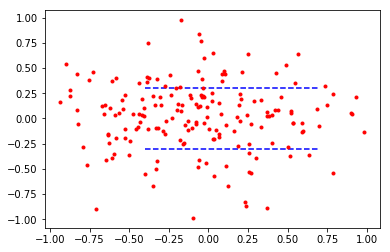

In [1141]:
flux_sum = np.array(flux_sum)
sel = (flux_diff>-1)&(flux_diff<1)&(flux_sum>-1)&(flux_sum<1)
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(flux_sum[sel].reshape(-1,1), -flux_diff[sel].reshape(-1,1))
x = np.arange(-0.4,0.7,0.01)
y_pred = regr.predict(x.reshape(-1,1))
#plt.plot(x,regr.intercept_*np.ones_like(x),'k--')
plt.plot(x,np.zeros_like(x)-0.3,'b--')
plt.plot(x,np.zeros_like(x)+0.3,'b--')
plt.plot(flux_sum[sel],-flux_diff[sel]-3*regr.coef_[0][0]*flux_sum[sel],'r.')
print('Coefficients: \n', regr.coef_)
print('intercept: \n', regr.intercept_)

0.204314982693
1.40157
1.55378
0.0348996
0.412501 0.0546777944886


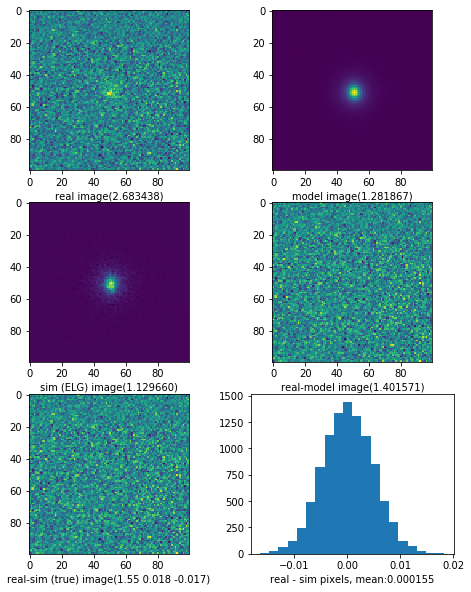

In [1142]:
biased_sel = (-flux_diff[sel]-regr.coef_[0][0]*3*flux_sum[sel]<-0.3)
idx = np.where(biased_sel)[0]
i = idx[4]

radius = 50

print(flux_diff[i])
plt.figure(figsize = (8,10))
plt.subplot(3,2,1)
x_cen = int(bx[i])
y_cen = int(by[i])
dat = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('real image(%f)'%dat.sum())

plt.subplot(3,2,2)
x_cen = int(bx[i])
y_cen = int(by[i])
dat = model[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('model image(%f)'%dat.sum())
plt.subplot(3,2,3)
x_cen = int(bx[i])
y_cen = int(by[i])
dat = sim_img[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('sim (ELG) image(%f)'%dat.sum())
plt.subplot(3,2,4)
x_cen = int(bx[i])
y_cen = int(by[i])
dat = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]-\
model[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
print(dat.sum())
plt.xlabel('real-model image(%f)'%dat.sum())

plt.subplot(3,2,5)
x_cen = int(bx[i])
y_cen = int(by[i])
dat = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]-\
sim_img[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('real-sim (true) image(%.2f %.3f %.3f)'%(dat.sum(),dat.max(),dat.min()))
print(dat.sum())
print(dat.max()-dat.min())

plt.subplot(3,2,6)
p=plt.hist(dat.ravel(),bins=20)
plt.xlabel('real - sim pixels, mean:%f' %dat.mean())

print(tractor_bad['shapeexp_r'][i],tractor_bad['shapeexp_e1'][i]**2+tractor_bad['shapeexp_e2'][i]**2)

In [1143]:
tractor_bad['flux_g'][i]

1.1434687

In [1144]:
sim_matched[bad_source_idx]['gflux'][i]

1.017596632351192

In [1145]:
sim_bad.columns

ColDefs(
    name = 'id'; format = 'J'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'x'; format = 'D'
    name = 'y'; format = 'D'
    name = 'gflux'; format = 'D'
    name = 'mw_transmission_g'; format = 'E'
    name = 'rflux'; format = 'D'
    name = 'mw_transmission_r'; format = 'E'
    name = 'zflux'; format = 'D'
    name = 'mw_transmission_z'; format = 'E'
    name = 'n'; format = 'D'
    name = 'rhalf'; format = 'D'
    name = 'e1'; format = 'D'
    name = 'e2'; format = 'D'
)

In [1146]:
(np.array([1,2,3])*np.array([1,2,3])/np.array([2,2,3])).sum()

5.5

In [329]:
!ls /global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/chunk23_test1/coadd/127/1273p255/more_rs680/legacysurvey-1273p255-image-g.fits.fz

/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/chunk23_test1/coadd/127/1273p255/more_rs680/legacysurvey-1273p255-image-g.fits.fz
